<a href="https://colab.research.google.com/github/Jainamrockk/DeepAudioClassifier/blob/main/DeepAudioClassifieripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu tensorflow_io matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip install tensorflow-io==0.36.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.37.1
    Uninstalling tensorflow-io-gcs-filesystem-0.37.1:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.37.1


In [3]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import zipfile

In [4]:
def unzip_file(zip_filepath, extract_to_dir):

    if not os.path.exists(extract_to_dir):
        os.makedirs(extract_to_dir)

    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(extract_to_dir)


In [5]:
!kaggle datasets download -d kenjee/z-by-hp-unlocked-challenge-3-signal-processing

Dataset URL: https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing
License(s): CC-BY-NC-SA-4.0
100% 601M/604M [00:37<00:00, 11.1MB/s]
100% 604M/604M [00:37<00:00, 16.9MB/s]


In [6]:
zip_filepath = '/content/z-by-hp-unlocked-challenge-3-signal-processing.zip'
extract_to_dir = '/content/Data'

unzip_file(zip_filepath, extract_to_dir)

In [7]:
CAPUCHIN_FILE = os.path.join('Data', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NON_CAPUCHIN_FILE = os.path.join('Data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [8]:
def load_wav_16k_mono(filename):
  """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
  #Load encoded wav file
  file_contents = tf.io.read_file(filename)
  #Decode wav (tensors by channels)
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
  #Remove trailing axis
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  #Amplitude Goes from 44100Hz to 16000Hz
  wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
  return wav

In [9]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NON_CAPUCHIN_FILE)


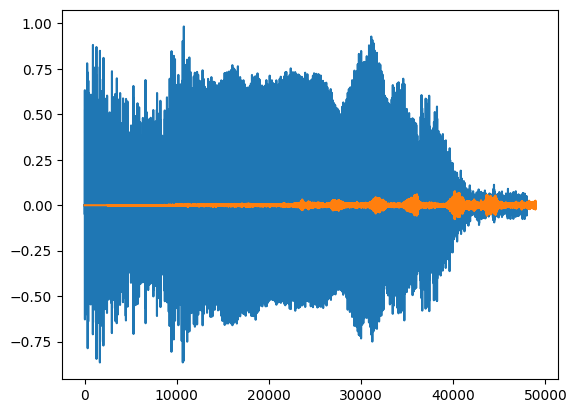

In [10]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# **CONVERT THE DATA TO SPECTROGRAM**

In [11]:
POS = os.path.join('Data', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('Data', 'Parsed_Not_Capuchinbird_Clips')

# **Creation of Tensorflow Datasets**

In [12]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

# **Add Labels and Combine Positive and Negative Samples**

In [13]:
positives= tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives= tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [14]:
data.shuffle(1000).as_numpy_iterator().next()

(b'Data/Parsed_Not_Capuchinbird_Clips/killdeer-sound-8.wav', 0.0)

# **Calculate Avg Length of a Capuchin Call**
1.Calculate Wave Cycle Length


In [15]:
 lengths = []
 for file in os.listdir(POS):
  tensor_wave = load_wav_16k_mono(os.path.join(POS, file))
  lengths.append(len(tensor_wave))

In [16]:
lengths

[40000,
 48000,
 40000,
 56000,
 56000,
 56000,
 40000,
 48000,
 40000,
 48000,
 56000,
 64000,
 48000,
 56000,
 56000,
 40000,
 56000,
 56000,
 48000,
 48000,
 40000,
 48000,
 48000,
 64000,
 56000,
 80000,
 56000,
 56000,
 48000,
 56000,
 56000,
 40000,
 48000,
 56000,
 40000,
 48000,
 56000,
 48000,
 56000,
 48000,
 40000,
 48000,
 56000,
 40000,
 48000,
 56000,
 40000,
 56000,
 64000,
 56000,
 64000,
 48000,
 48000,
 48000,
 56000,
 56000,
 48000,
 56000,
 56000,
 64000,
 48000,
 56000,
 56000,
 56000,
 48000,
 48000,
 48000,
 48000,
 72000,
 48000,
 64000,
 56000,
 64000,
 56000,
 56000,
 64000,
 48000,
 56000,
 64000,
 64000,
 48000,
 64000,
 48000,
 48000,
 56000,
 64000,
 40000,
 56000,
 56000,
 64000,
 56000,
 56000,
 40000,
 56000,
 56000,
 72000,
 48000,
 64000,
 56000,
 64000,
 48000,
 64000,
 32000,
 56000,
 56000,
 64000,
 48000,
 56000,
 64000,
 56000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 64000,
 48000,
 56000,
 56000,
 56000,
 48000,
 48000,
 64000,
 48000,


2.Calculate Mean,Min and Max

In [17]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [18]:
54156/16000 #almost 3 sec so will take 48k

3.38475

In [19]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [20]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# **Covert Data To Spectrogram**

In [21]:
def preprocess(file_path, label):
  wave = load_wav_16k_mono(file_path)
  wav = wave[:48000]
  zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
  wav = tf.concat([zero_padding, wav],0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram, label

# Test the function


In [22]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [23]:
spectrogram, label = preprocess(filepath, label)

In [24]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[1.3635669e-02],
        [1.8972293e-02],
        [1.9497104e-02],
        ...,
        [4.2950924e-06],
        [2.5141253e-06],
        [1.6130507e-06]],

       [[5.4674316e-03],
        [6.4460752e-03],
        [6.9771879e-03],
        ...,
        [1.5792763e-06],
        [1.8505873e-06],
        [7.0221722e-07]],

       [[1.2331279e-02],
        [1.0310943e-02],
        [1.8399239e-03],
        ...,
        [1.7134248e-06],
        [7.4245003e-07],
        [2.8871000e-07]],

       ...,

       [[8.1562996e-04],
        [1.6796336e-02],
        [2.3889774e-02],
        ...,
        [2.7469105e-07],
        [1.7452363e-06],
        [4.1723251e-07]],

       [[2.0925701e-02],
        [1.9295031e-02],
        [8.6697554e-03],
        ...,
        [4.7005486e-07],
        [1.4850598e-06],
        [4.7683716e-07]],

       [[3.1404704e-02],
        [2.6356634e-02],
        [9.9307280e-03],
        ...,
        [4.1149042

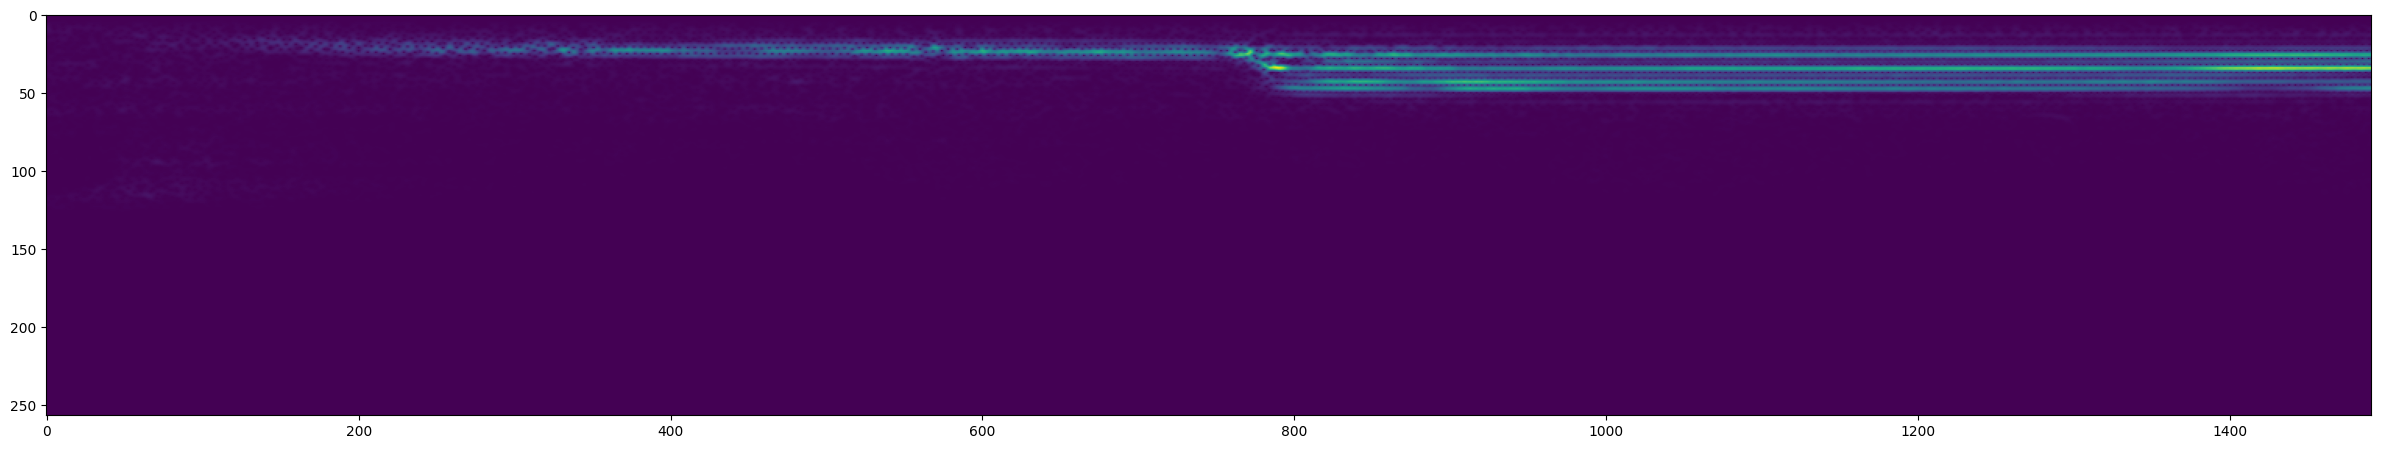

In [25]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [26]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [27]:
spectrogram, label = preprocess(filepath, label)

In [28]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[7.93666113e-05],
        [6.36106051e-05],
        [2.51849015e-05],
        ...,
        [1.51642758e-04],
        [1.23339123e-04],
        [1.60255935e-04]],

       [[1.56376627e-05],
        [2.67069099e-05],
        [8.11691425e-05],
        ...,
        [7.53328131e-05],
        [5.01593750e-05],
        [8.33769445e-05]],

       [[9.60461330e-06],
        [4.06095351e-05],
        [8.20625792e-05],
        ...,
        [1.00877296e-04],
        [5.69385738e-05],
        [2.21711816e-05]],

       ...,

       [[3.12512275e-04],
        [3.62748222e-04],
        [3.61387560e-04],
        ...,
        [2.10418548e-05],
        [1.45186177e-05],
        [1.25553925e-06]],

       [[4.37863666e-04],
        [4.38525720e-04],
        [4.10819950e-04],
        ...,
        [2.58894761e-05],
        [1.47205774e-05],
        [6.07871334e-06]],

       [[4.38634946e-04],
        [4.56263981e-04],
        [4.21778794e-04]

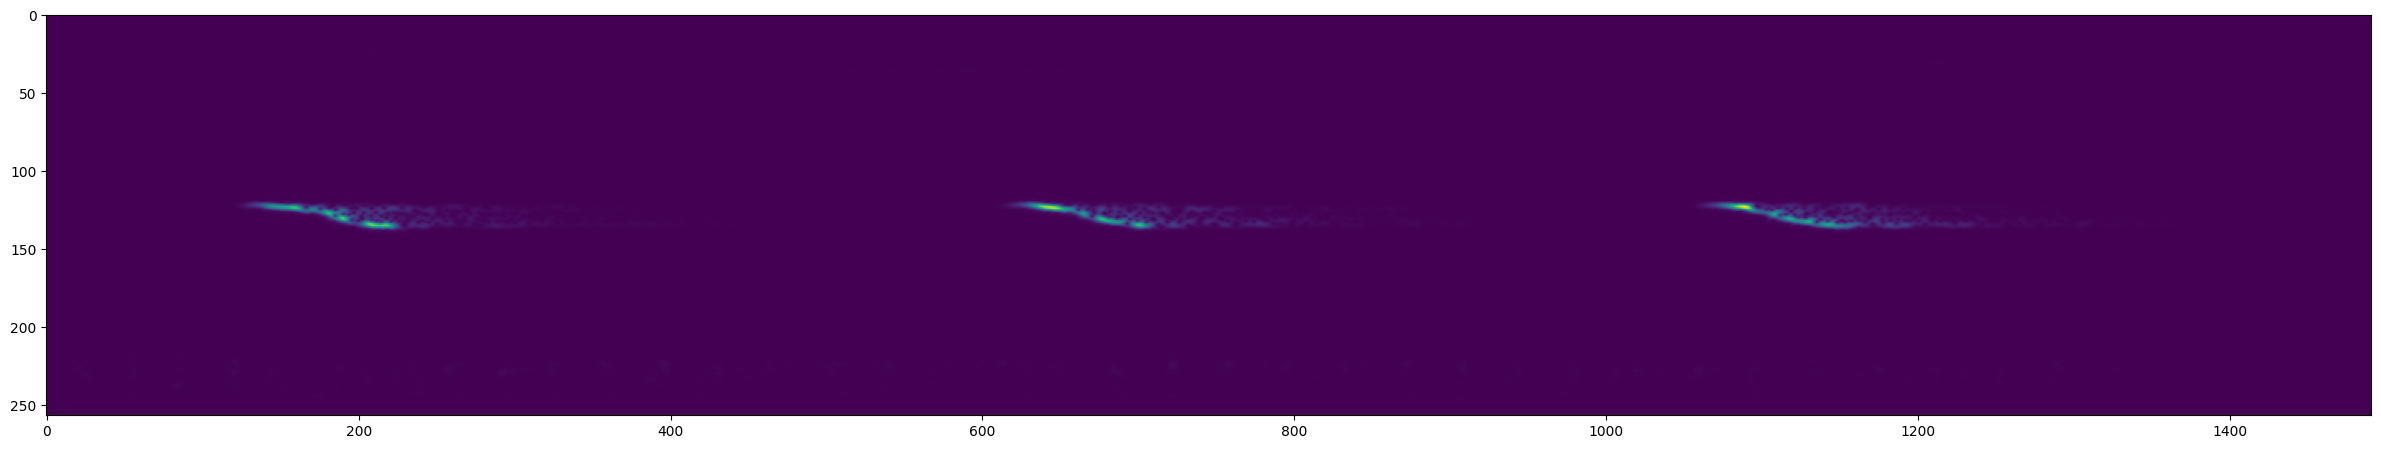

In [29]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0]) #transposed to see it w.r.t time on x axis
plt.show()

# **Build a DeepLearning Model For The Same**

1. Create Training and Testing Partitions

In [30]:
data = data.map(preprocess) #now every dataset object will contain a reference to preprocess function and when needed acts accordingly
data = data.cache() # Caches the dataset to avoid redundant computations.
data = data.shuffle(buffer_size=1000)
data = data.batch(16) #Shuffles the dataset to ensure randomness.
data = data.prefetch(8) #Prefetches 8 batches to speed up training by overlapping data loading and model execution. And reduces CPU/GPU bottleneck


# **Split into Training and Testing Partitions**

In [31]:
len(data)*0.7 #len(data)=51

35.699999999999996

In [32]:
train = data.take(36)
test = data.skip(36).take(15)

In [33]:
 samples, labels = train.as_numpy_iterator().next()

In [34]:
samples.shape

(16, 1491, 257, 1)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten

In [36]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491,257,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 744, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 742, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 371, 62, 16)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 368032)            0         
                                                                 
 dense (Dense)               (None, 128)               4

In [39]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 [==============================] - 10s 110ms/step - loss: 0.8861 - recall: 0.8133 - precision: 0.8084 - val_loss: 0.0500 - val_recall: 0.9855 - val_precision: 1.0000
Epoch 2/4
36/36 [==============================] - 4s 100ms/step - loss: 0.0423 - recall: 0.9750 - precision: 0.9873 - val_loss: 0.0101 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/4
36/36 [==============================] - 3s 89ms/step - loss: 0.0269 - recall: 0.9810 - precision: 1.0000 - val_loss: 0.0123 - val_recall: 0.9839 - val_precision: 1.0000
Epoch 4/4
36/36 [==============================] - 3s 89ms/step - loss: 0.0068 - recall: 0.9933 - precision: 1.0000 - val_loss: 0.0080 - val_recall: 0.9857 - val_precision: 1.0000


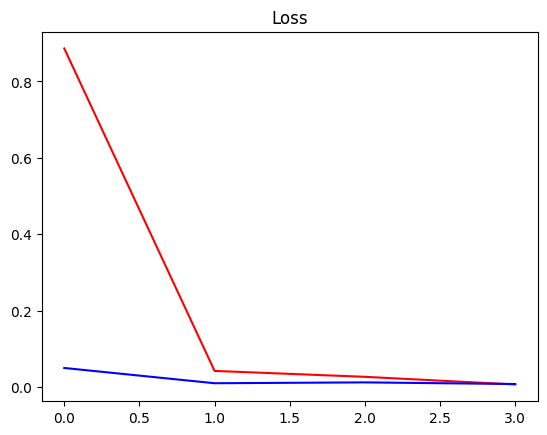

In [40]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

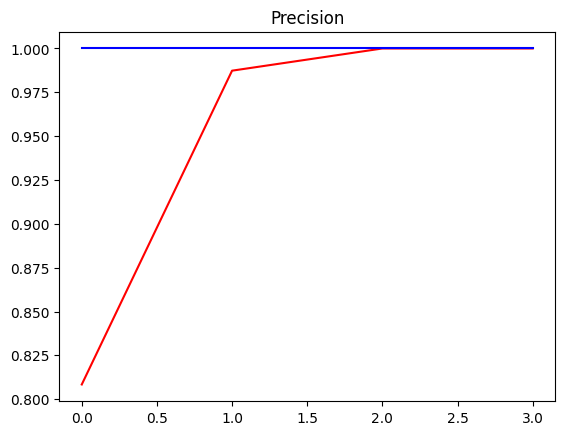

In [41]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

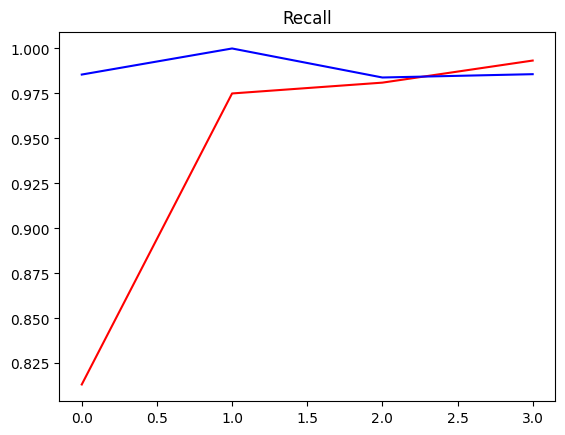

In [42]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

In [43]:
hist.history

{'loss': [0.8861310482025146,
  0.042319491505622864,
  0.02689017727971077,
  0.006844961084425449],
 'recall': [0.8132529854774475,
  0.9750000238418579,
  0.9810126423835754,
  0.9932885766029358],
 'precision': [0.8083832263946533, 0.9873417615890503, 1.0, 1.0],
 'val_loss': [0.04999640956521034,
  0.010111614130437374,
  0.012324868701398373,
  0.008049183525145054],
 'val_recall': [0.9855072498321533,
  1.0,
  0.9838709831237793,
  0.9857142567634583],
 'val_precision': [1.0, 1.0, 1.0, 1.0]}

# **Making Prediction on a Single Clip**

In [44]:
x_test, y_test = test.as_numpy_iterator().next()

In [45]:
x_test.shape

(16, 1491, 257, 1)

In [46]:
y_test.shape

(16,)

In [47]:
yhat = model.predict(x_test)

1/1 [==============================] - 0s 129ms/step


In [48]:
yhat

array([[3.8531206e-10],
       [3.3289564e-06],
       [1.0000000e+00],
       [1.3990949e-14],
       [8.8432721e-15],
       [1.7818529e-03],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.2892558e-07],
       [7.1193926e-14],
       [8.5165747e-10],
       [8.7858524e-07],
       [3.2974631e-15],
       [5.7551009e-04],
       [3.4796076e-07],
       [1.2561019e-09]], dtype=float32)

In [49]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [50]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [51]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [52]:
yhat

[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [53]:
y_test.astype(int)

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

# **Building Forest Parsing Functions**

In [54]:
#Now since it is a forest so we have to deal with multiple channel so instead
#of old function for load will create a new load_mp3 function
def load_mp3_16k_mono(filename):
  """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
  #Load file
  res = tfio.audio.AudioIOTensor(filename)
  #Convert to tensor and combine channels
  tensor = res.to_tensor()
  tensor = tf.math.reduce_sum(tensor, axis=1)/2
  #Extract sample rate and cast
  sample_rate = res.rate
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  #Resample to 16kHz
  wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
  return wav


In [55]:
mp3 = os.path.join('Data', 'Forest Recordings', 'recording_00.mp3')

In [56]:
wav = load_mp3_16k_mono(mp3)

In [57]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [58]:
samples, index = audio_slices.as_numpy_iterator().next()

In [59]:
samples.shape

(1, 48000)

In [60]:
len(audio_slices)

60

In [61]:
index

array([8.143327e-12], dtype=float32)

# **Build Function to Convert Clips into Windowed Spectrograms**

In [62]:
def preprocess_mp3(sample, index):
  sample = sample[0]
  zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
  wav = tf.concat([zero_padding, sample],0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram

In [63]:
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)
audio_slices = audio_slices.prefetch(32)

In [64]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

1/1 [==============================] - 3s 3s/step


In [65]:
yhat

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# ***GROUP CONSECUTIVE DETECTIONS***

In [66]:
from itertools import groupby

In [67]:
yhat = [key for key,group in groupby(yhat)]

In [68]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

# ***LOOP OVER ALL THE FILES IN THE FOREST RECORDINGS***

In [69]:
results = {}
for file in os.listdir(os.path.join('Data', 'Forest Recordings')):
  mp3 = os.path.join('Data', 'Forest Recordings', file)
  wav = load_mp3_16k_mono(mp3)
  audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
  audio_slices = audio_slices.map(preprocess_mp3)
  audio_slices = audio_slices.batch(64)
  # audio_slices = audio_slices.prefetch(32)
  yhat = model.predict(audio_slices)
  yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]
  yhat = [key for key,group in groupby(yhat)]
  results[file] = yhat

1/1 [==============================] - 0s 375ms/step


In [70]:
results

{'recording_79.mp3': [0],
 'recording_55.mp3': [0],
 'recording_42.mp3': [0],
 'recording_00.mp3': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 'recording_38.mp3': [0, 1, 0],
 'recording_18.mp3': [0, 1, 0],
 'recording_24.mp3': [0],
 'recording_45.mp3': [0, 1, 0, 1, 0, 1, 0],
 'recording_83.mp3': [0],
 'recording_77.mp3': [0, 1, 0, 1, 0, 1, 0],
 'recording_35.mp3': [0],
 'recording_32.mp3': [0, 1, 0, 1, 0],
 'recording_97.mp3': [0, 1, 0, 1, 0, 1, 0, 1, 0],
 'recording_20.mp3': [0],
 'recording_80.mp3': [0, 1, 0],
 'recording_53.mp3': [0],
 'recording_40.mp3': [0, 1, 0],
 'recording_22.mp3': [0, 1, 0, 1, 0],
 'recording_99.mp3': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 'recording_07.mp3': [0, 1, 0, 1, 0],
 'recording_19.mp3': [0],
 'recording_46.mp3': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 'recording_49.mp3': [0],
 'recording_57.mp3': [0, 1, 0, 1, 0, 1, 0],
 'recording_62.mp3': [0],
 'recording_31.mp3': [0, 1, 0],
 'recording_08.mp3': [0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  0,


In [71]:
postprocessed = {}
for file,scores in results.items():
  postprocessed[file] = tf.math.reduce_sum([key for key,group in groupby(scores)]).numpy()


In [72]:
myKeys = list(postprocessed.keys())
myKeys.sort()
postprocessed = {i:postprocessed[i] for i in myKeys}
postprocessed

{'recording_00.mp3': 5,
 'recording_01.mp3': 0,
 'recording_02.mp3': 0,
 'recording_03.mp3': 0,
 'recording_04.mp3': 4,
 'recording_05.mp3': 0,
 'recording_06.mp3': 5,
 'recording_07.mp3': 2,
 'recording_08.mp3': 25,
 'recording_09.mp3': 0,
 'recording_10.mp3': 5,
 'recording_11.mp3': 3,
 'recording_12.mp3': 0,
 'recording_13.mp3': 0,
 'recording_14.mp3': 0,
 'recording_15.mp3': 2,
 'recording_16.mp3': 5,
 'recording_17.mp3': 3,
 'recording_18.mp3': 1,
 'recording_19.mp3': 0,
 'recording_20.mp3': 0,
 'recording_21.mp3': 1,
 'recording_22.mp3': 2,
 'recording_23.mp3': 5,
 'recording_24.mp3': 0,
 'recording_25.mp3': 8,
 'recording_26.mp3': 2,
 'recording_27.mp3': 0,
 'recording_28.mp3': 14,
 'recording_29.mp3': 0,
 'recording_30.mp3': 3,
 'recording_31.mp3': 1,
 'recording_32.mp3': 2,
 'recording_33.mp3': 0,
 'recording_34.mp3': 4,
 'recording_35.mp3': 0,
 'recording_36.mp3': 0,
 'recording_37.mp3': 3,
 'recording_38.mp3': 1,
 'recording_39.mp3': 5,
 'recording_40.mp3': 1,
 'recording_41

In [73]:
import csv

In [74]:
with open('capuchin_scores.csv', 'w', newline='') as file:
  writer = csv.writer(file, delimiter=',')
  writer.writerow(['recording', 'capuchin_calls'])
  for key, value in postprocessed.items():
    writer.writerow([key, value])